# Predicting Life Expectancy using Machine Learning
By : Samuel Yeboah Osafo    

____

## Problem Description:

This is a typical Regression Machine Learning project that leverages historical data to predict insights into the future. This problem statement is aimed at predicting Life Expectancy rate of a country given various features.

Life expectancy is a statistical measure of the average time a human being is expected to live. Life expectancy depends on various factors: Regional variations, Economic Circumstances, Sex Differences, Mental Illnesses, Physical Illnesses, Education, Year of their birth and other demographic factors. This problem statement provides a way to predict average life expectancy of people living in a country when various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country are given.



## Solution:

Using Machine Learning I will explain and predict the life expectancy of different countries depending on various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country.

Here I have worked on Two models. The models were  used to test if they can provide good prediction with less erros while predicting the life expectancy for new data. 

#### The Model Algorithms have been used are:
* [Linear Regression](#5.1.-Linear-Regression-Model)
* [Random Forest](#5.2.-Random-Forest-Model)

#### The Project is Divided into :
1. [Importing Libraries](#1.-Importing-Libraries) 
2. [Importing Data](#2.-Importing-Data)   
3. [Data Visualisation](#3.-Data-Visualisation)
4. [Data Pre-Processing](#4.-Data-Pre-Processing)    
5. [Modelling](#5.-Modelling)
    1. [Linear Regression](#5.1.-Linear-Regression-Model)
    2. [Random Forest](#5.2.-Random-Forest-Model)
6. [Conclusion](#6.-Conclusion)


# 1.  Importing Libraries

In [1]:
# loading libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Importing Data

In [2]:
# loading the dataset
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [105]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# displaying the first 10 of the dataset
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
# displaying the last 10 of the data
df.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


# 3. Data Visualisation

**Pandas 'dataframe.info()' function is used to get a concise summary of the dataframe**

In [5]:
# checking for the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Now checking shape of the dataset which will return the value of number of Rows and Columns**

In [6]:
# checking for the shape
df.shape

(2938, 22)

**I have 2938 rows and 22 columns**.    
**Now I have Check The Columns Names in dataset**.

In [7]:
# checking for the columns
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

 **There are some un-wanted spaces in the column names which may leads to error in future while maping to them for Data Visualisation. So, I have to remove those spaces by Renaming them**.

In [8]:
# renaming some selecting columns
df = df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles','BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS', ' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 ' BMI ',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

**Ploting Target Class which is 'Life expectency'**

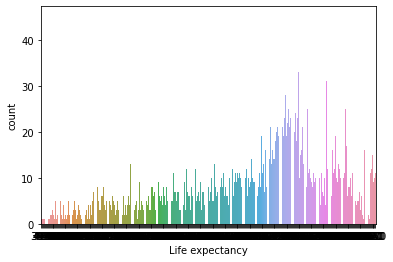

In [9]:
sns.countplot(df['Life expectancy'])
plt.show() 

**Ploting Status**

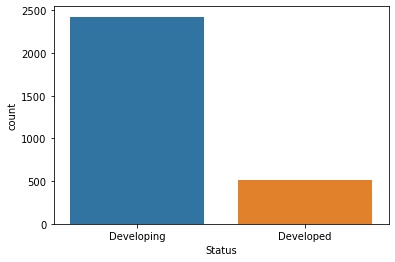

In [10]:
# plotting the status
sns.countplot(df['Status'])

plt.show()

**Ploting Heat Map to show the relation between data values**

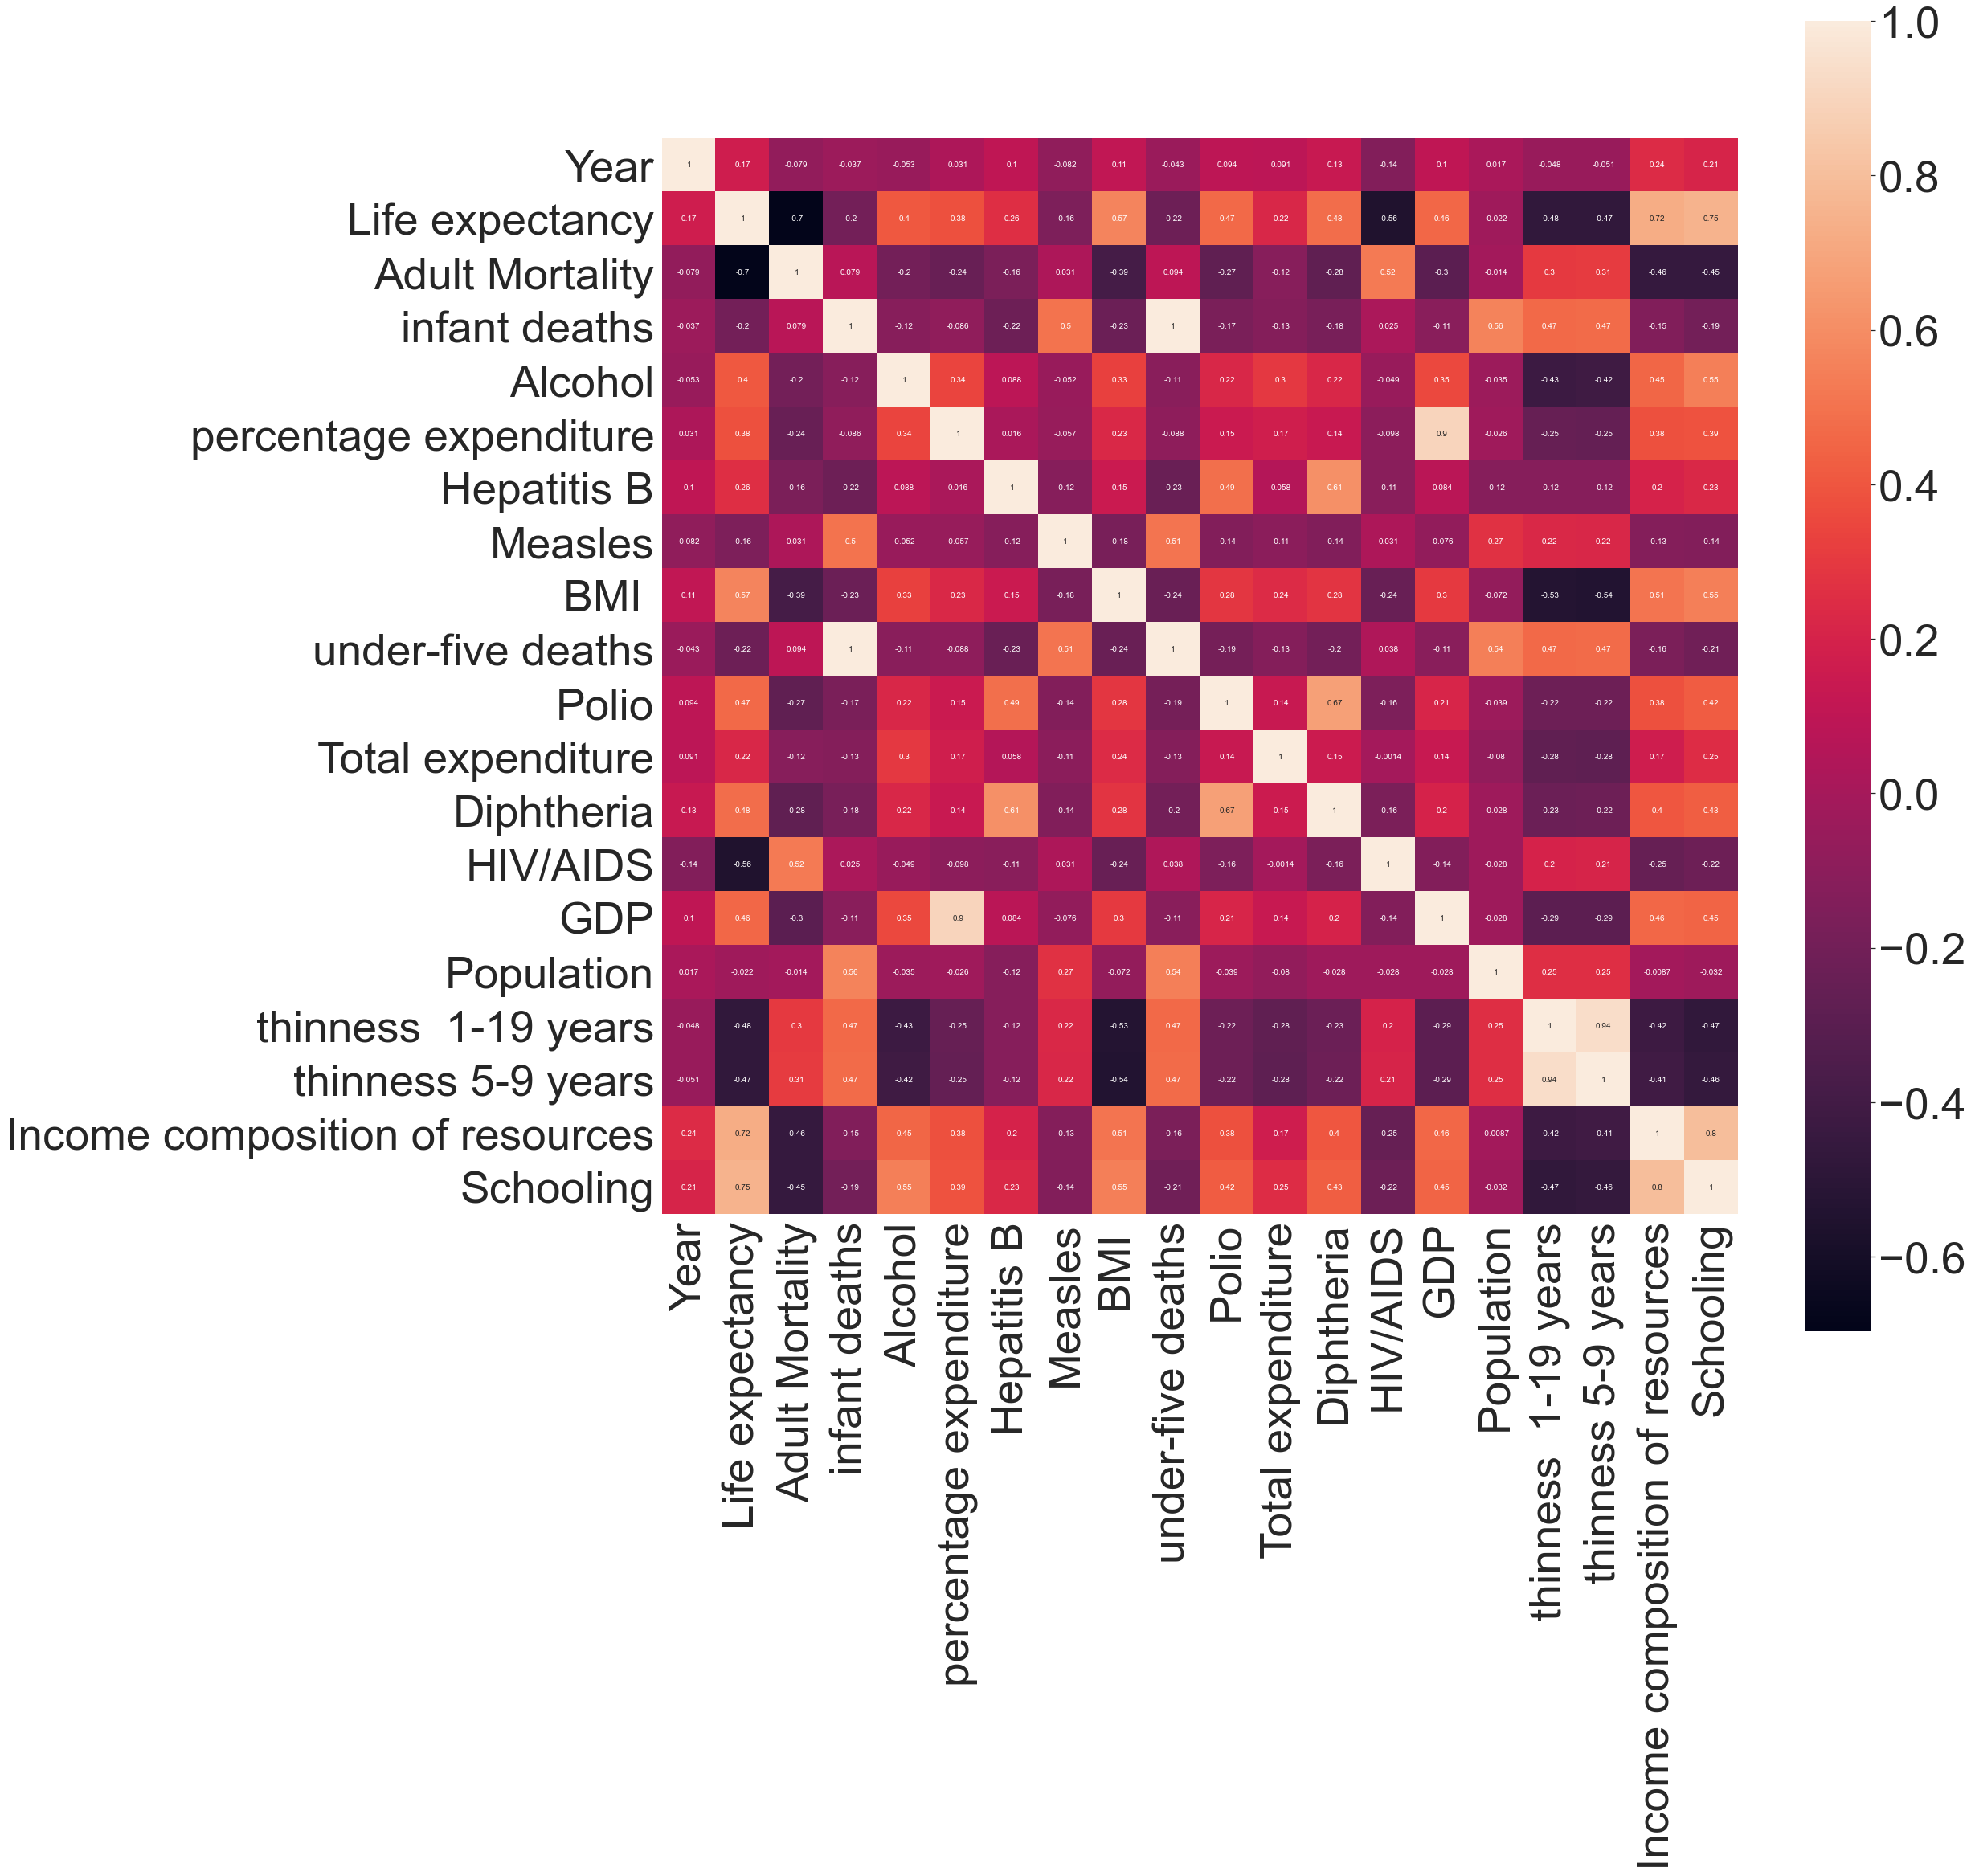

In [113]:
# using heatmap to show the relation between data values
fig, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=5)
sns.heatmap(df.corr(), square=True, cbar=True, annot=True, annot_kws={'size':10})
plt.show()

# 4. Data Pre-Processing

**Transposing Data**

In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


**Counting data value to check if there is any missing value**.

In [116]:
# counting the data values to check for missing values
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
HIV/AIDS                           2938
GDP                                2490
Population                         2286
thinness  1-19 years               2904
thinness 5-9 years                 2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

 **From above the values aren't equal means some values are missing, So I have to fill those value otherwise this will form error in future.    For this I have to first Check for which feature has and how many Null Values.**

In [117]:
# From the above, there are some missing values in some of the columns
df.isnull().sum()



Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

**Above  there are some feature who have many number of Null value, I have to fill them to avoid Traing error and Testing Error**

In [119]:
df = df.fillna(df.mean())
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Varifying  if all the null Values are filled or not**.

In [120]:
# verifying if all missing values are filled or not
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [121]:
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2938
Adult Mortality                    2938
infant deaths                      2938
Alcohol                            2938
percentage expenditure             2938
Hepatitis B                        2938
Measles                            2938
 BMI                               2938
under-five deaths                  2938
Polio                              2938
Total expenditure                  2938
Diphtheria                         2938
HIV/AIDS                           2938
GDP                                2938
Population                         2938
thinness  1-19 years               2938
thinness 5-9 years                 2938
Income composition of resources    2938
Schooling                          2938
dtype: int64

**In Above Two cells  there is no Null value left and quantity of all the values are equal.**

**Varifying the target class values which is 'Life expectancy'**

In [122]:
# verifying the target class
print(df['Life expectancy'])

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64


**Checking if there is any object or bool types Data Values**

In [123]:
#checking to see if there are bool or object data values
df.select_dtypes(include=['bool','object']).columns

Index(['Country', 'Status'], dtype='object')

 **There are two categorical Data value**

In [166]:
df.Status.unique()

array([0, 1], dtype=int64)

**Handling Categorical Data Value of Staus by assigning an unique integer value** : As Status has two values 'Developing' and 'Developed'. So, I  Encoded value of 'Developing as 0' and  'Developed as 1.'

In [125]:
df['Status'] = df.Status.map({'Developing':0, 'Developed':1})
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Now I have got the values of all the dataset as integer and floats.**

Developing = 0, Developed=1 


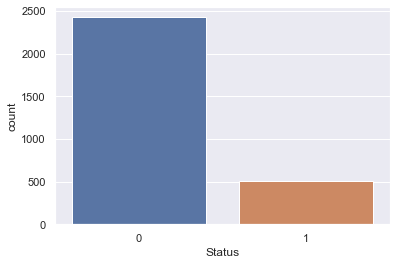

In [128]:
sns.set(font_scale=1)
sns.countplot(df['Status'])
print('Developing = 0, Developed=1 ')

**I  will not be using the  Country column feature. So, I will drop it from dataset**

In [129]:
df.drop(columns='Country', inplace=True)
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


** The Target Class is "Life expectancy"**
I have to find which column are depended and which column are independent on target class. And independent ones will be removed.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', ' BMI ', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


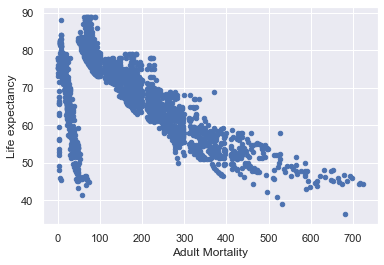

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


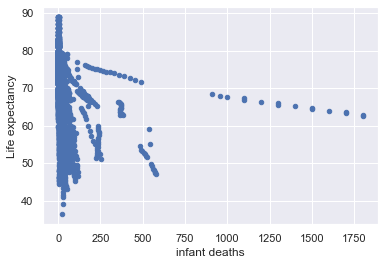

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


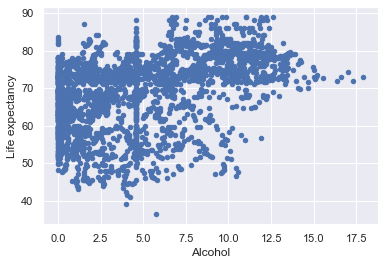

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


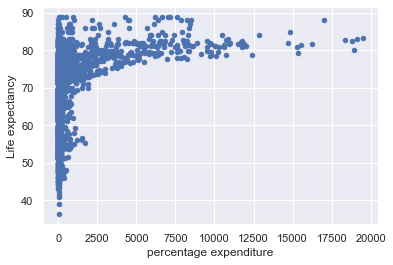

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


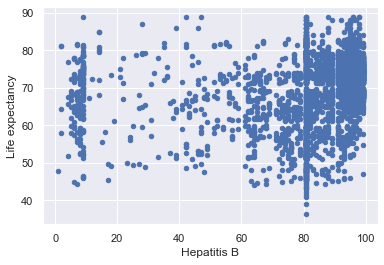

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


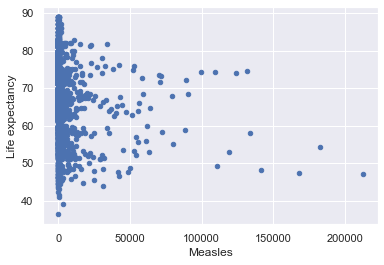

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


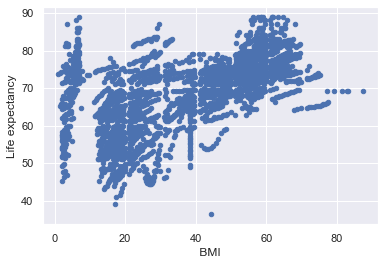

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


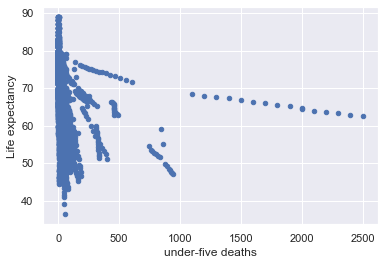

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


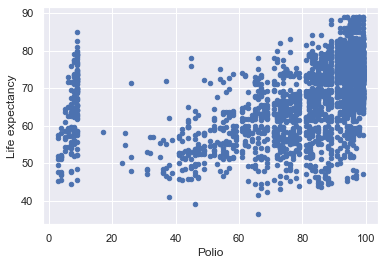

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


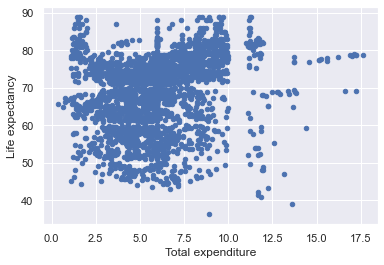

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


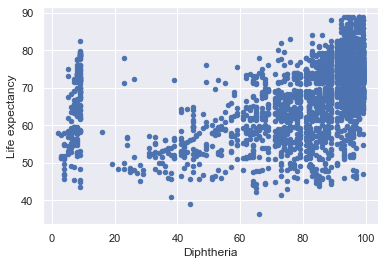

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


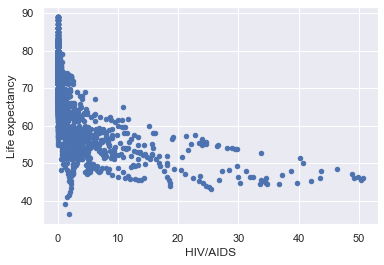

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


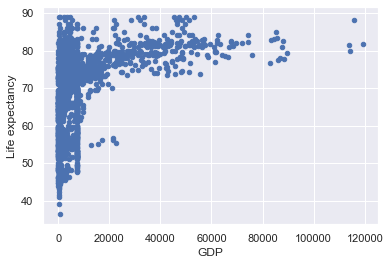

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


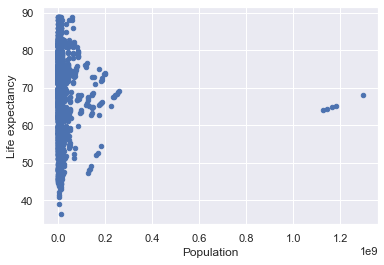

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


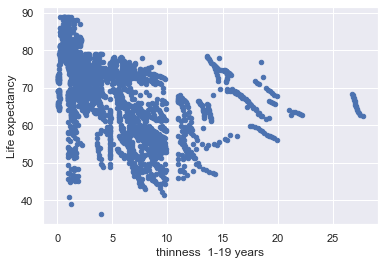

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


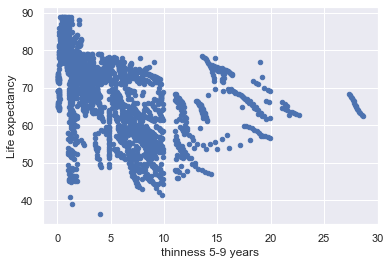

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


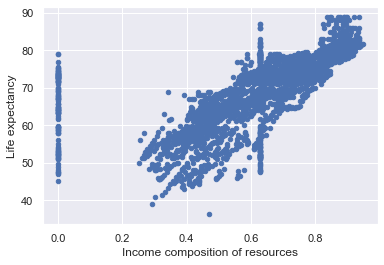

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


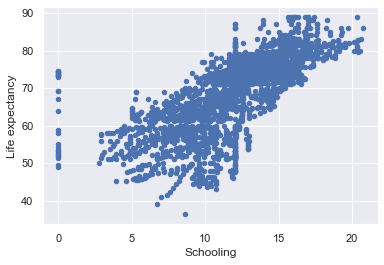

In [134]:

cols=list(df.columns)
print(cols)

for i in cols[3:]:
    sns.set(font_scale=1)
    df.plot.scatter(x=i, y='Life expectancy')
    plt.show()

### Checking if data has any Outliners Values

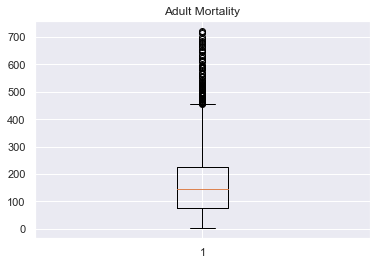

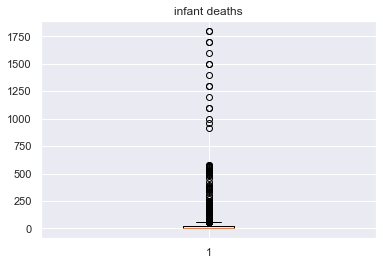

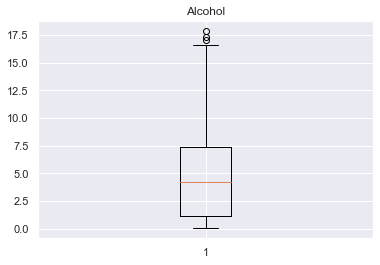

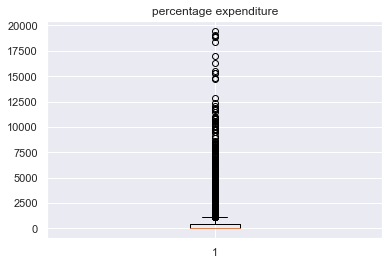

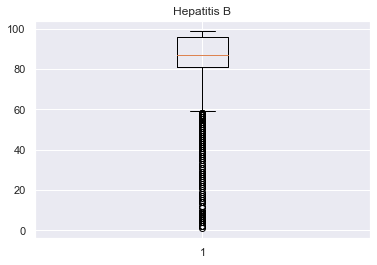

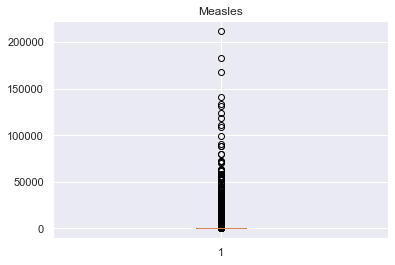

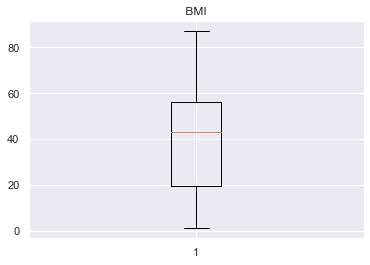

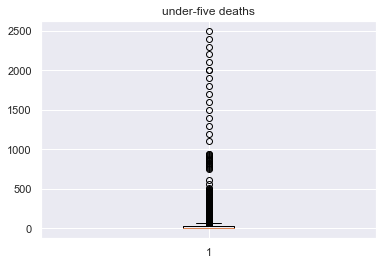

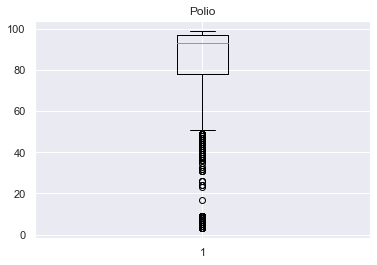

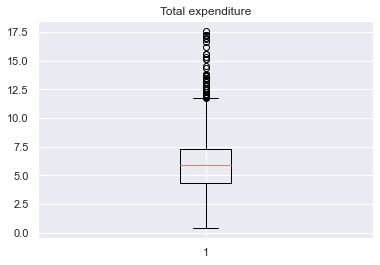

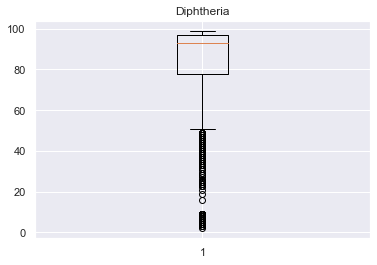

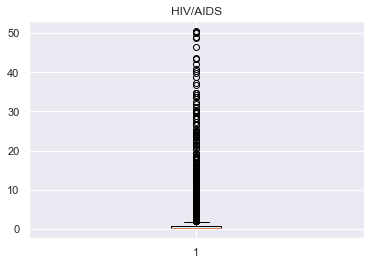

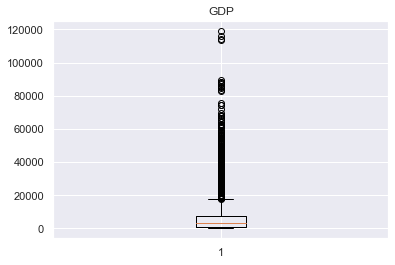

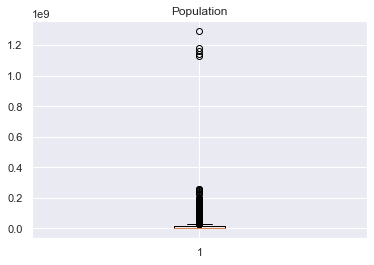

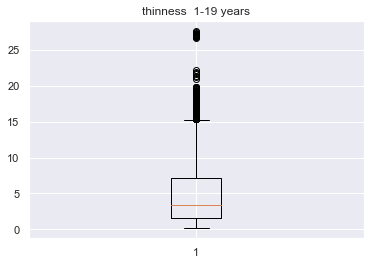

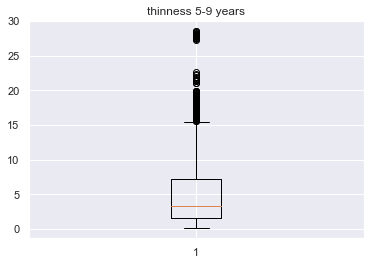

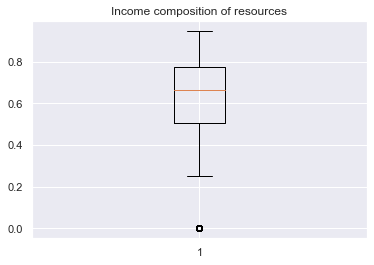

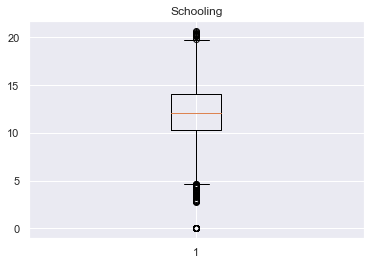

In [136]:
from scipy.stats.mstats import winsorize
for i in cols[3:]:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [138]:
out_col = {'Life expectancy':1, 'Adult Mortality':2,
       'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5, 'Hepatitis B':6,
       'Measles':7, 'BMI':8, 'under-five deaths':9, 'Polio':10, 'Total expenditure':11,
       'Diphtheria':12, 'HIV/AIDS':13, 'GDP':14, 'Population':15,
       'thinness  1-19 years':16, 'thinness 5-9 years':17,
       'Income composition of resources':18, 'Schooling':19}

for variable in out_col.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlines_Values = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    
    print("Outliers in {} = {}".format(variable, outlines_Values))

Outliers in Life expectancy = 17
Outliers in Adult Mortality = 86
Outliers in infant deaths = 315
Outliers in Alcohol = 3
Outliers in percentage expenditure = 389
Outliers in Hepatitis B = 316
Outliers in Measles = 542


KeyError: 'BMI'

**Re-checking number of Outliners**

In [165]:
for variable in out_col.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlines_Values = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    
    print("Outliers in {} = {}".format(variable, outlines_Values))

Outliers in Life expectancy = 0
Outliers in Adult Mortality = 0
Outliers in infant deaths = 315
Outliers in Alcohol = 3
Outliers in percentage expenditure = 389
Outliers in Hepatitis B = 316
Outliers in Measles = 542


KeyError: 'BMI'

**As there is still some Outliners left, I can ignore them as they are not going to highly effect our Model.**

**Creating X and Y data frame for Training and Testing Purpose**

In [141]:
from sklearn.model_selection import train_test_split
X = df.drop(['Life expectancy'], axis = 1)
X.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,263.0,58,0.01,71.279624,65.0,1154,19.1,79,47.0,8.16,65.0,0.1,584.259210,1.275338e+07,14.6,15.0,0.479,10.1
1,2014,0,271.0,58,0.01,73.523582,62.0,492,18.6,79,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,14.6,15.0,0.476,10.0
2,2013,0,268.0,58,0.01,73.219243,64.0,430,18.1,79,62.0,8.13,64.0,0.1,631.744976,1.275338e+07,14.6,15.0,0.470,9.9
3,2012,0,272.0,58,0.01,78.184215,67.0,2787,17.6,79,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,14.6,15.0,0.463,9.8
4,2011,0,275.0,58,0.01,7.097109,68.0,3013,17.2,79,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,14.6,15.0,0.454,9.5


In [142]:
Y = df['Life expectancy']
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

**Splitting dataset for Training and Testing Purpose**

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
print(X.shape, Y.shape)

(2938, 20) (2938,)


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2938 non-null   float64
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

# 5. Modelling

 **Importing Linear Regression Library function from Sklearn.**

In [146]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression(normalize=True)
lreg.fit(X_train, Y_train)

LinearRegression(normalize=True)

**Predicting**

In [147]:
lpred = lreg.predict(X_test)
lpred

array([69.92968441, 78.47438172, 75.98882522, 77.39243477, 50.48555061,
       46.54589447, 70.76037112, 72.32935412, 75.71499411, 58.44347677,
       50.82182423, 57.61547991, 58.23015139, 72.02054594, 72.69364768,
       58.40456366, 54.78689594, 80.17633368, 61.8539968 , 80.35178136,
       81.26498643, 82.20830256, 72.1818902 , 69.88485325, 72.67004021,
       62.26905962, 62.05302262, 63.74463353, 81.50129143, 73.50973375,
       67.03911878, 75.40371653, 68.23482137, 66.0183131 , 79.54735252,
       56.46076291, 60.04834499, 71.39403059, 65.37812335, 76.26335082,
       52.53232935, 59.64811732, 76.28415577, 80.64157639, 75.91018065,
       55.15725701, 78.90247425, 71.47073157, 62.54639841, 67.38129948,
       56.02905988, 62.53636076, 77.44602384, 73.4289552 , 73.39126122,
       54.96751938, 78.84682154, 73.47819892, 68.12667614, 68.73753482,
       76.84397665, 51.78739614, 74.34926435, 68.8947001 , 48.95706879,
       55.28556057, 50.01010532, 81.07084265, 59.53582784, 77.39

In [148]:
Y_test

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
2284    72.7
1554    65.5
862     58.8
1413    69.9
1762    69.0
Name: Life expectancy, Length: 735, dtype: float64

**Evaluating Model :** Printing Mean Square Error, Quadratic mean and Mean absolute error

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Square Error (MSE) : " +str(mean_squared_error(Y_test, lpred)))
print("Mean absolute error(MAE) : " +str(mean_absolute_error(Y_test, lpred)))
print("Quadratic mean (RMSE):  " +str(np.sqrt(mean_squared_error(Y_test, lpred))))

Mean Square Error (MSE) : 11.929045214339693
Mean absolute error(MAE) : 2.6083914527703436
Quadratic mean (RMSE):  3.4538449899119232


**Printing Training accuracy and Testing accuracy**

In [150]:
print("Training accuracy: " +str(lreg.score(X_train, Y_train)))
print("Testing accuracy:  " +str(lreg.score(X_test, Y_test)))

Training accuracy: 0.8604657239450728
Testing accuracy:  0.8666864761379216


**Score values**

In [151]:
lreg.score(X_test,Y_test)

0.8666864761379216

**Importing Random Forest Regressor Library function from Sklearn.**

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, Y_train)

RandomForestRegressor()

**Predicting**

In [153]:
rf_pred=rf.predict(X_test)
rf_pred

array([72.813     , 76.002     , 74.99      , 75.845     , 53.287     ,
       52.008     , 65.977     , 73.918     , 76.603     , 54.809     ,
       52.132     , 53.287     , 57.412     , 74.291     , 69.43949863,
       62.212     , 57.244     , 79.124     , 69.769     , 78.938     ,
       80.939     , 84.388     , 72.512     , 69.04424932, 71.49624385,
       68.492     , 54.83      , 65.184     , 82.69      , 74.147     ,
       67.317     , 74.034     , 73.877     , 71.839     , 78.726     ,
       49.714     , 57.765     , 72.39724932, 64.176     , 73.677     ,
       54.526     , 60.193     , 75.359     , 81.514     , 76.434     ,
       48.71      , 80.51      , 74.694     , 60.519     , 71.798     ,
       54.393     , 72.059     , 82.371     , 80.892     , 74.625     ,
       57.975     , 73.479     , 75.59      , 64.584     , 69.2       ,
       78.302     , 54.4       , 74.315     , 72.722     , 51.583     ,
       53.174     , 52.826     , 76.455     , 60.566     , 71.66

In [154]:
Y_test

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
2284    72.7
1554    65.5
862     58.8
1413    69.9
1762    69.0
Name: Life expectancy, Length: 735, dtype: float64

**Evaluating Model :** Printing Mean Square Error, Quadratic mean and Mean absolute error

In [155]:
print('Mean absolute error(MAE) : ' +str(mean_absolute_error(Y_test, rf_pred)))
print('Mean Square Error (MSE) :  ' +str(mean_squared_error(Y_test, rf_pred)))
print('Quadratic mean (RMSE): ' +str(np.sqrt(mean_squared_error(Y_test,rf_pred))))

Mean absolute error(MAE) : 1.132982383554514
Mean Square Error (MSE) :  2.929739066390252
Quadratic mean (RMSE): 1.711648055644107


**Printing Training accuracy and Testing accuracy**

In [164]:
print("Training accuracy: " +str(rf.score(X_train, Y_train)))
print("Testing accuracy:  " +str(rf.score(X_test, Y_test)))

Training accuracy: 0.9936914909765038
Testing accuracy:  0.967258583405537


**Score values**

In [157]:
rf.score(X_test,Y_test)

0.967258583405537

In [159]:
from sklearn.metrics import r2_score
rfscore = r2_score(Y_test, rf_pred)
print("R-2 score is: " +str(rfscore))

R-2 score is: 0.967258583405537


**Ploting Random Forest Prediction graph and comparing it with Linear Regression Model Predicted Graph.**

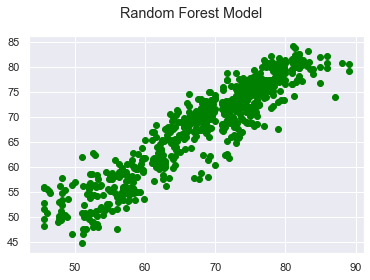

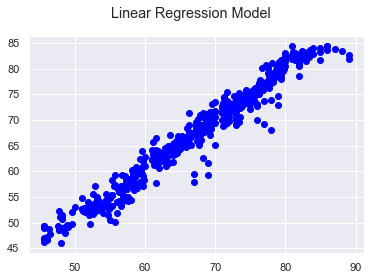

In [162]:
plt.figure().suptitle('Random Forest Model')
plt.scatter(Y_test,lpred, color = 'green')

plt.figure().suptitle('Linear Regression Model')
plt.scatter(Y_test,rf_pred, color='blue')
plt.show()

## Conclusion


 Comparing the models , RandomForest gave less error and best prediction score as compare to Linear Regression.